# Assignment 4
## Sutyrina Olga

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import jdcal
from datetime import date
import dateutil
from convertdate import gregorian


from datetime import datetime
import time

##  Calculating the Total Solar Irradiance (TSI)

In [2]:
sigma = 5.67*(10**(-8))
T = 5800

#  P_sun = (sigma*(T**4)*A_sun)/A_sun
P_sun = sigma*(T**4)
print ('Power flux near the Sun is', P_sun, "[W]")

r_sun = 695510000
r_au = 149597870700
P_earth = sigma*(T**4)*(r_sun**2)/(r_au**2)
print ('Power flux near the Earth is', P_earth, "[W]")

Power flux near the Sun is 64164532.32 [W]
Power flux near the Earth is 1386.9185801586566 [W]


## Reading and processing of the data Total Solar Irradiance (TSI)

In [3]:
def convertfrom(x):
    x = gregorian.from_jd(x)
    x = datetime(*x)
    return x

In [4]:
location_tsi = r'D:\Assignment4_data\sorce_tsi_24hr_l3.csv'
data_tsi = pd.read_csv(location_tsi, sep = ',')

data_tsi = data_tsi[data_tsi["tsi_1au (W/m^2)"] > 0.0]
data_tsi["time (Julian Date)"] = data_tsi["time (Julian Date)"].apply(convertfrom)
tsi = pd.Series(list(data_tsi["tsi_1au (W/m^2)"]), index = data_tsi["time (Julian Date)"])
tsi_m = tsi.resample('M').mean()

## Reading and processing of the data of the Daily sunspot number

In [5]:
location_sun = r'D:\Assignment4_data\international_sunspot_number.csv'
data_sun = pd.read_csv(location_sun, sep = '    ',engine = 'python')
data_sun["time (yyyy MM dd)"] = data_sun["time (yyyy MM dd)"].apply(dateutil.parser.parse)
data_sun = data_sun[data_sun["ssn (count)"] > 0.0]
sun = pd.Series(list(data_sun["ssn (count)"]), index=data_sun["time (yyyy MM dd)"])
sun1 = sun + 136032
sun_m = sun.resample('M').mean()
sun_m1 = sun1.resample('M').mean()*0.01

## Plotting graphs

### Total Solar Irradiance (TSI)

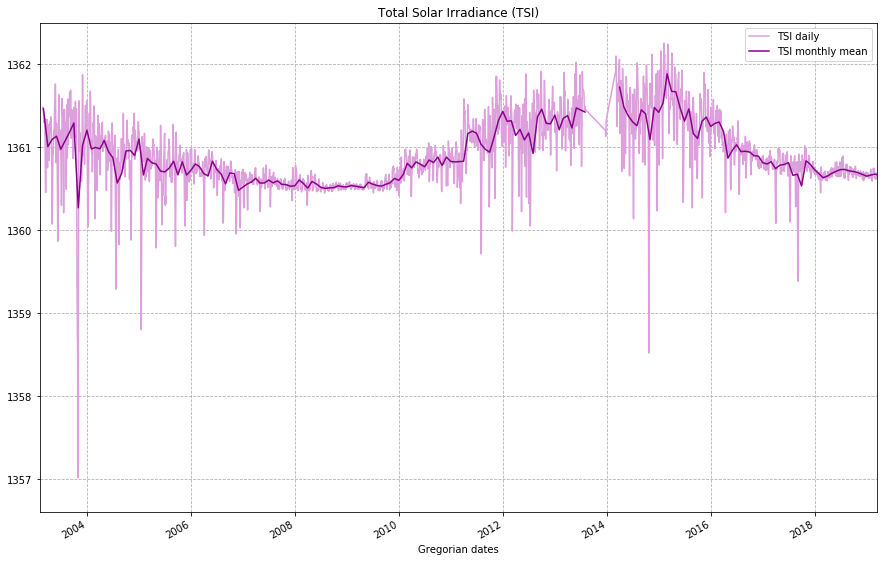

In [6]:
plt.figure(1)
tsi.plot(label = 'TSI daily',figsize=(15,8),color = 'plum') 
tsi_m.plot(label = 'TSI monthly mean',figsize=(15,10),color = 'darkmagenta') 
plt.axis(["2003-02-1","2019-03-11", 1356.6, 1362.5])
plt.grid(linestyle='--')
plt.legend()
plt.title("Total Solar Irradiance (TSI)")
plt.xlabel('Gregorian dates')
plt.show()

###  Sunspot number

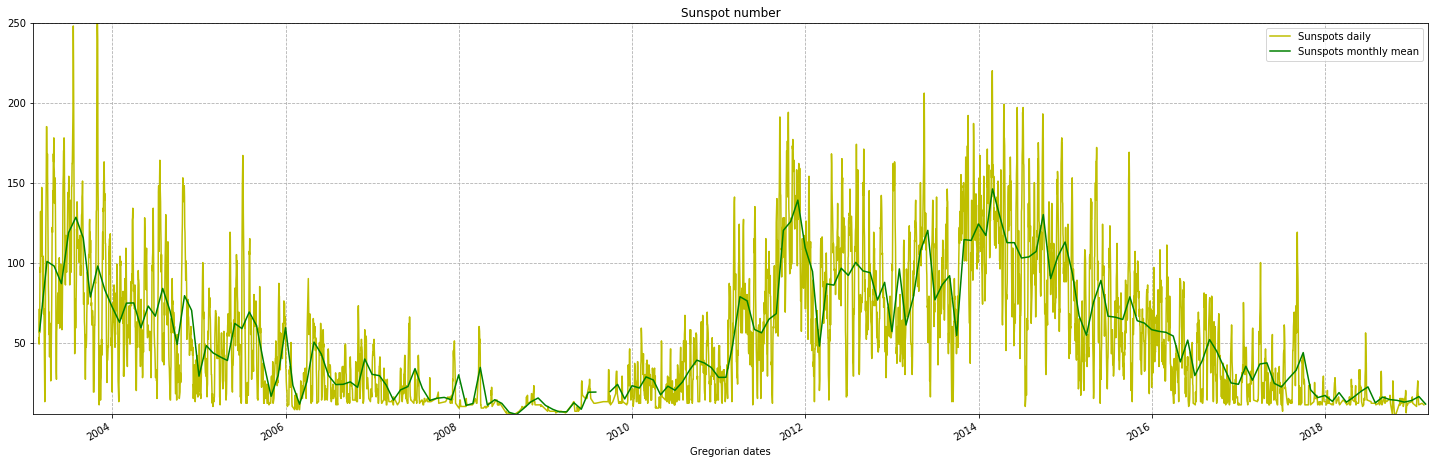

In [7]:
sun.plot(label = 'Sunspots daily',figsize=(25,8),color = 'y') 
sun_m.plot(label = 'Sunspots monthly mean',figsize=(25,8),color = 'g')
plt.axis(["2003-02-1","2019-03-11", 5, 250])
plt.grid(linestyle='--')
plt.title("Sunspot number")
plt.xlabel('Gregorian dates')
plt.legend()
plt.show()

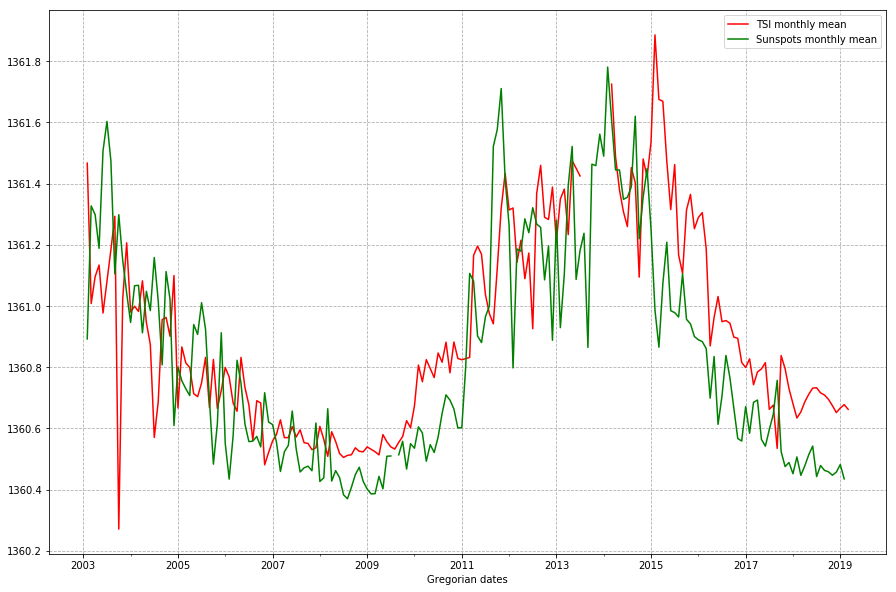

In [8]:
plt.figure(1) 
tsi_m.plot(label = 'TSI monthly mean',figsize=(15,10),color = 'r') 
sun_m1.plot(label = 'Sunspots monthly mean',figsize=(15,10),color = 'g')
plt.grid(linestyle='--')
plt.legend()
plt.xlabel('Gregorian dates')
plt.show()

## Discussion 

###  1. Which is the difference between the plot obtained from step 5 and the plot obtained in the step 4? 

#### The difference between the graphs lies in the dispersion between the maximum and minimum values; in the case of a smoothed graph, this variation is less due to the averaging of data over the month.

### 2. What is the relationship between sunspot numbers and TSI?  
### 3. How the Sun’s dynamics can influence the TSI variations along of the solar cycle? 

#### The TSI is in phase with solar activity because the Sun is faculae-dominated, which is not the case for every Sun-like stars. Solar faculae cause an increase in solar radiation. Solar faculae are called bright fields surrounding sunspots.The greater the sunspots number, the higher the irradiance.

### 4.  Why accurate measurements of the Sun’s total irradiance are obtained from the space? 

#### The Earth's atmosphere is capable of absorbing irradiance and in order to obtain accurate measurements it is necessary to collect them in space.

### 5. Why the radiometers suffer degradation in space environment? 
#### Solar UV radiation
#### For example SOVAP has suﬀered substantialdegradation due to a combination of solar irradiation and contamination. SOVAP is particularly vulnerable because its shut-ters and radiators are exposed to unshielded solar radiation.